**1) import the necessary modules (numpy, pandas, matplotlib.pyplot) and set jupyter to generate plots inline. (4 points)**

In [1]:

%matplotlib inline

import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt



**2) Read in the iris data set and examine the head to make sure the data is in a usable format (2 points)**


In [2]:
df = pd.read_csv("iris.txt")
df.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**3) Create a new (and reduced) data set consisting of only the PetalLength and PetalWidth columns (1 point)**

Aka make this shit skinny

In [4]:
reducedDataFrame = pd.DataFrame(df,columns=['PetalLength','PetalWidth'])
print(reducedDataFrame)

     PetalLength  PetalWidth
0            1.4         0.2
1            1.4         0.2
2            1.3         0.2
3            1.5         0.2
4            1.4         0.2
5            1.7         0.4
6            1.4         0.3
7            1.5         0.2
8            1.4         0.2
9            1.5         0.1
10           1.5         0.2
11           1.6         0.2
12           1.4         0.1
13           1.1         0.1
14           1.2         0.2
15           1.5         0.4
16           1.3         0.4
17           1.4         0.3
18           1.7         0.3
19           1.5         0.3
20           1.7         0.2
21           1.5         0.4
22           1.0         0.2
23           1.7         0.5
24           1.9         0.2
25           1.6         0.2
26           1.6         0.4
27           1.5         0.2
28           1.4         0.2
29           1.6         0.2
..           ...         ...
120          5.7         2.3
121          4.9         2.0
122          6

**4) Create a scatter plot of the reduced data set to make sure the data does not have any outliers or anomalies. (1 point)**

Data looks fine although it's bunched in two clusters.  No anomalies or outliers.

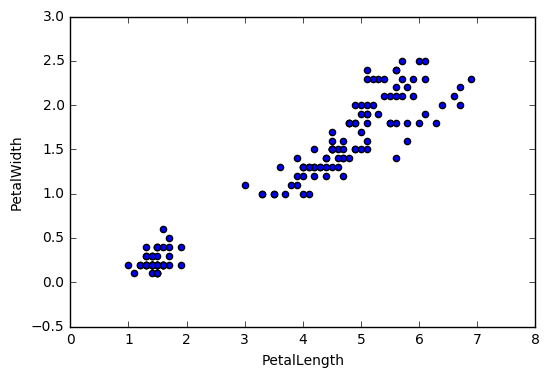

In [5]:
reducedDataFrame.plot.scatter(x='PetalLength',y='PetalWidth')

**5) Implement the basic functions to create a regression model**

+ Create a function to calculate the coefficients of a least squares approximation (1 point)
+ Create a function to use the least squares coefficients to predict the value of a given input point (1 point)

In [18]:
def CalculateCoefficients (reducedDataFrame):
    x = reducedDataFrame['PetalLength'].values
    y = reducedDataFrame['PetalWidth'].values
    Ones = np.ones(len(reducedDataFrame))
    #print(Ones)
    #create the leading 1s in the matrix so I can multiply
    XL = np.stack((Ones,x), axis=-1)
    #print (XL)
    Xtrans = np.transpose(XL)
    #print (Xtrans)
    Xmult = np.dot(Xtrans,XL)
    #print (Xmult)
    #let's creat the inverse of the matrix
    Xinverse = np.linalg.inv(Xmult)
    #print (Xinverse)
    #let's do matrix multiplication
    Xident = np.dot(Xmult,Xinverse)
    Ymult = np.dot(Xtrans,y)
    coeff = np.dot(Xinverse,Ymult)
    print(coeff)
    return coeff

CalculateCoefficients (reducedDataFrame)

[-0.36651405  0.41641913]


array([-0.36651405,  0.41641913])

In [22]:
def predictValuePoint(x, Coeff):
    y = Coeff[0] + (x*Coeff[1])
    return y

predictValuePoint(reducedDataFrame['PetalLength'], CalculateCoefficients (reducedDataFrame))

[-0.36651405  0.41641913]


0      0.216473
1      0.216473
2      0.174831
3      0.258115
4      0.216473
5      0.341398
6      0.216473
7      0.258115
8      0.216473
9      0.258115
10     0.258115
11     0.299757
12     0.216473
13     0.091547
14     0.133189
15     0.258115
16     0.174831
17     0.216473
18     0.341398
19     0.258115
20     0.341398
21     0.258115
22     0.049905
23     0.341398
24     0.424682
25     0.299757
26     0.299757
27     0.258115
28     0.216473
29     0.299757
         ...   
120    2.007075
121    1.673940
122    2.423494
123    1.673940
124    2.007075
125    2.132001
126    1.632298
127    1.673940
128    1.965433
129    2.048717
130    2.173643
131    2.298568
132    1.965433
133    1.757224
134    1.965433
135    2.173643
136    1.965433
137    1.923791
138    1.632298
139    1.882149
140    1.965433
141    1.757224
142    1.757224
143    2.090359
144    2.007075
145    1.798865
146    1.715582
147    1.798865
148    1.882149
149    1.757224
Name: PetalLength, dtype

**6) Using your regression model, calculate the points along the regression line of the reduced data set (1 point)**


In [23]:
reducedDataFrame['Predicted'] = predictValuePoint(reducedDataFrame['PetalLength'], CalculateCoefficients (reducedDataFrame))

[-0.36651405  0.41641913]


**7) Plot the regression line on top of a scatter plot of the reduced data set (you will need to remove duplicate X values to get matplotlib to draw an actual line) (2 points)**

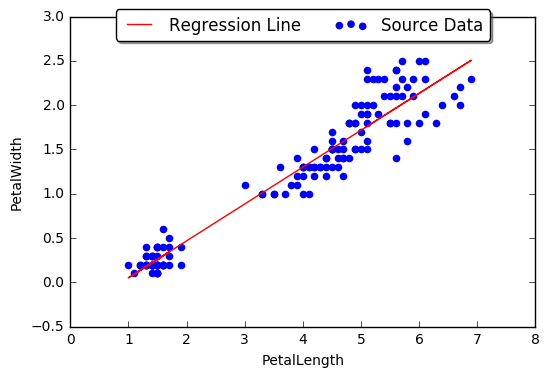

In [31]:
x =  reducedDataFrame['PetalLength'].values
y =  reducedDataFrame['PetalWidth'].values
z =  reducedDataFrame['Predicted'].values

plt.scatter(x,y, color='b', label='Source Data')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.plot(x,z,  color='r', label='Regression Line')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True)
plt.show()